# 1. Single csv analysis:

Use the Pandas library in Python to read each CSV file into a DataFrame.
Concatenate or merge these DataFrames into a single DataFrame.


In [18]:
import pandas as pd
import glob

# Read all CSV files into DataFrames
all_files = glob.glob('..\detailed\Institutions_*_*.csv')
df_list = []
for file in all_files:
    region, field = get_region_and_field(file)
    df = pd.read_csv(file)
    df['region'] = region
    df['field'] = field
    df_list.append(df)
# df_list = [pd.read_csv(file) for file in all_files]
for df in df_list:
    df['abbr'] = df['University'].apply(lambda name: ''.join(word[0] for word in name.split() if word[0].isupper()))


# Concatenate DataFrames into a single DataFrame
# combined_df = pd.concat(df_list, ignore_index=True)

In [19]:
print(df_list[0])

    Rank                       University  Faculty Count  Publication Count  \
0      1            University of Toronto             57               24.0   
1      2           University of Waterloo             45               20.0   
2      3            University of Alberta             36               16.3   
3      4   University of British Columbia             29               13.2   
4      5           University of Montreal             20               12.0   
5      6          Simon Fraser University             32               11.6   
6      7                McGill University             15                5.6   
7      8                  York University             12                4.5   
8      9              Carleton University              5                3.6   
9      9             University of Ottawa              9                3.6   
10    11                 Université Laval             12                3.3   
11    12                     ETS Montreal           

In [16]:
for df in df_list:
    df['region'], df['field'] = zip(*df['file_name'].map(get_region_and_field))


KeyError: 'file_name'

In [14]:
import re
def get_region_and_field(file_name):
    # Get region
    region = re.search('Institutions_(.*?)_', file_name).group(1)
    # Get field
    field = re.search('_(.*?)\.csv', file_name).group(1).split('_')[-1]
    return region, field

In [15]:
get_region_and_field(all_files[0])

('CND', 'ai')

In [2]:
print(df_list[0])

    Rank                       University  Faculty Count  Publication Count  \
0      1            University of Toronto             57               24.0   
1      2           University of Waterloo             45               20.0   
2      3            University of Alberta             36               16.3   
3      4   University of British Columbia             29               13.2   
4      5           University of Montreal             20               12.0   
5      6          Simon Fraser University             32               11.6   
6      7                McGill University             15                5.6   
7      8                  York University             12                4.5   
8      9              Carleton University              5                3.6   
9      9             University of Ottawa              9                3.6   
10    11                 Université Laval             12                3.3   
11    12                     ETS Montreal           

In [5]:
def make_unique_abbr(df):
    dupli_index = 1
    res_list = []
    for i, ab in enumerate(df['abbr']):
        cnt = df['abbr'].to_list().count(ab)
        if cnt > 1:
            df['abbr'][i] = ab + '_'+ str(cnt)

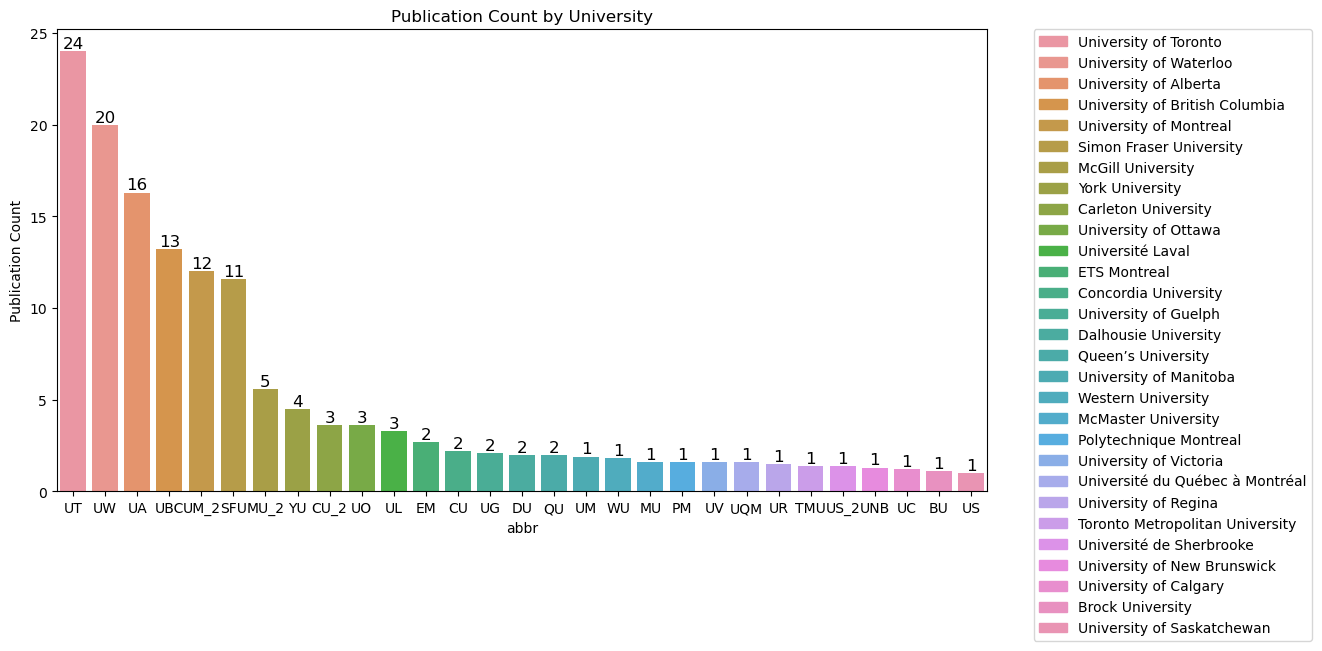

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming df is your DataFrame and it has been defined

# plt.figure(figsize=(12,6))
# ax = sns.barplot(x='abbr', y='Publication Count', data=df_list[0])
# plt.title('Publication Count by University')

# # Get the unique abbreviations and corresponding university names
# abbr_names = df_list[0][['abbr', 'University']]

# # Create a legend
# patches = [mpatches.Patch(color=ax.patches[i].get_facecolor(), label=label) for i, label in enumerate(abbr_names['University'])]

# # Add a legend to the plot
# # bbox_to_anchor=(1.05, 1) places the legend outside of the plot area on the right side
# # loc=2 places the legend at the top left corner of the legend bounding box
# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plt.show()

plt.figure(figsize=(12,6))
ax = sns.barplot(x='abbr', y='Publication Count', data=df_list[0])
plt.title('Publication Count by University')

# Get the unique abbreviations and corresponding university names
abbr_names = df_list[0][['abbr', 'University']]

# Create a legend
patches = [mpatches.Patch(color=ax.patches[i].get_facecolor(), label=label) for i, label in enumerate(abbr_names['University'])]

# Add a legend to the plot
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Add the exact number on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

# 2. Visualization Tools:

Use tools like Matplotlib, Seaborn, or Plotly to create various visualizations.
(using Seaborn for a scatter plot):

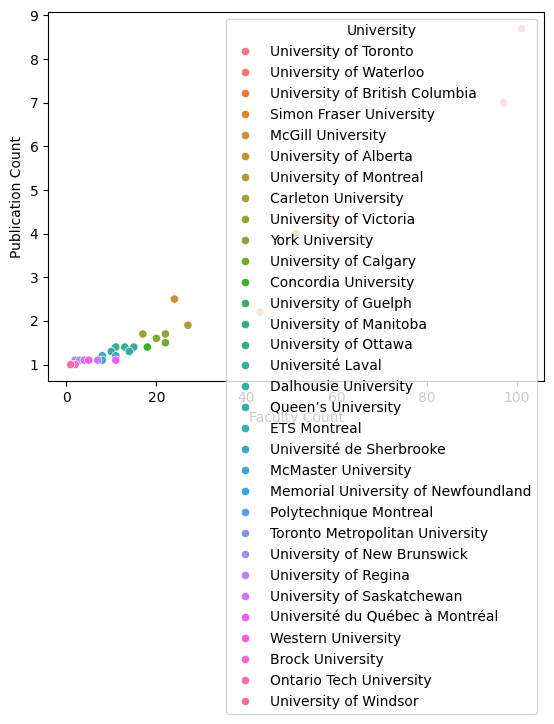

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Faculty Count', y='Publication Count', hue='University', data=combined_df)
plt.show()


# 4. Interactive Dashboards:

Create interactive dashboards using tools like Dash (by Plotly) or Tableau.
Dash allows you to create web-based applications with interactive visualizations.
Example (using Dash for an interactive scatter plot):

In [6]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        id='scatter-plot',
        figure={
            'data': [
                {'x': combined_df['Faculty Count'], 'y': combined_df['Publication Count'], 'mode': 'markers', 'type': 'scatter'}
            ],
            'layout': {'title': 'Faculty Count vs Publication Count'}
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


/tmp/ipykernel_4216/778128745.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_4216/778128745.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


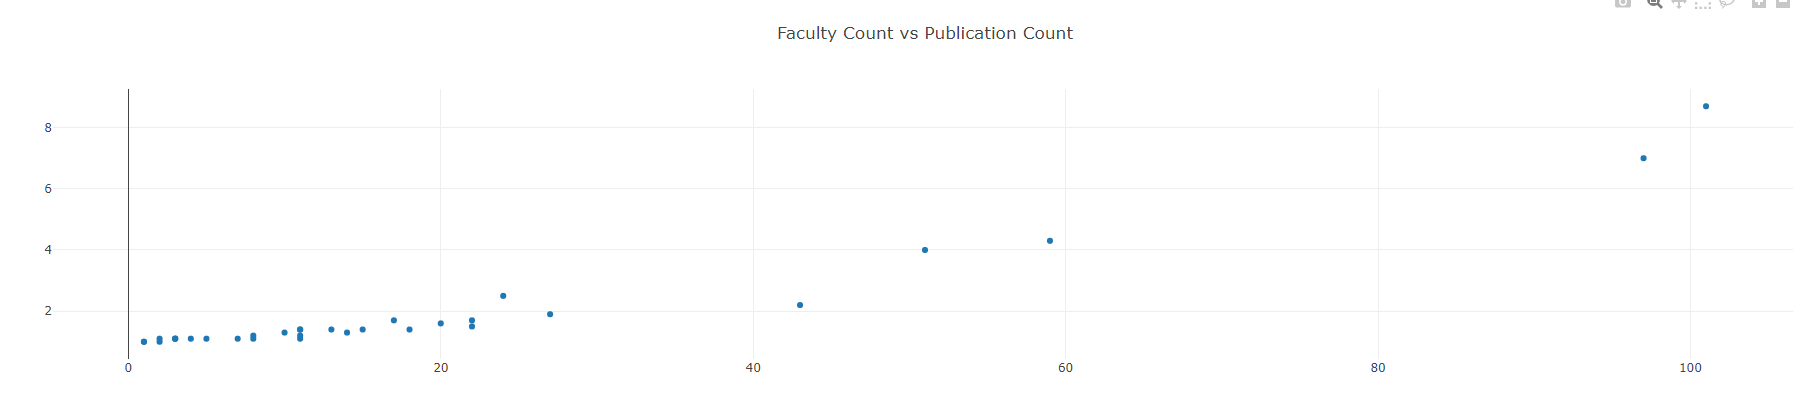

# 4. Geospatial Visualization:
If your data includes geographical information, consider using geospatial visualization tools like Folium or Plotly's Mapbox.

Example (using Folium for a simple map):

In [ ]:
import folium

m = folium.Map(location=[combined_df['Latitude'].mean(), combined_df['Longitude'].mean()], zoom_start=4)
for index, row in combined_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['University']).add_to(m)

m.save('map.html')

# 5. Cluster Analysis:

- Explore cluster analysis using algorithms like K-Means to identify patterns in the data.
- Example (using K-Means with scikit-learn):

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
combined_df['Cluster'] = kmeans.fit_predict(combined_df[['Faculty Count', 'Publication Count']])
